In [1]:
%load_ext autoreload
%autoreload 2

import sys

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
sys.path.append('..')
import transects
from ganwrapper import Generator

import util
from config import *
G = Generator(image_size=512)

/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ubuntu/anaconda3/envs/python3/lib/pyt

Setting up TensorFlow plugin "fused_bias_act.cu": Preprocessing... Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Preprocessing... Loading... Done.


In [4]:
# load latents across reg vals
im_num = 0
regs = [10000, 1e-1, 0]
ims = []
latents = []
im_orig = mpimg.imread(oj(DIR_IMS, f'{im_num + 1:05}.jpg'))
for reg in regs:
    folder = f'gen/generated_images_{reg}'
    im_fname = oj(DIR_PROCESSED, folder, f'{im_num + 1:05}.png')
    ims.append(mpimg.imread(im_fname))
    latents.append(np.load(oj(DIR_PROCESSED, folder, f'{im_num + 1:05}.npy')))

# now let's manipulate the images

In [5]:
kwargs = {
    # change these
    'save_dir': 'results/tnew',
    'latents': latents,
    
    # probably not these
    'G': G,
    'model_dir': DIR_LINEAR_DIRECTIONS,
    'orth': True,
    'randomize_seeds': False,
    'return_ims': True
}



# make 1D transects
LIMS = {
    'C': [-1.5, 1.7],
    'H': [-0.5, 0.0],
    'G': [-1.75, 1.75],
    
    # these are not calibrated
    'A': [-2, 2],
    'B': [-2, 2],
    'M': [-2, 2],
    'S': [-2, 2],
    'E': [-2, 2],
    'W': [-2, 2],    
}

## varying reg fig

In [8]:
'''
# make varying skin-color fig
ATTRS = 'C'
N_IMS = 7
LIMS['C'] = [-1.4, 1.4]
'''

# make varying age fig
ATTRS = 'A'
N_IMS = 7
LIMS['A'] = [-2, 2]


'''
ATTRS = 'CGAH' # HAGCBMSEW # CHG
N_IMS = 11
'''

transects_1d = {}
for attr in ATTRS:
    ims, attr_df = transects.make_transects(
        attr=attr,
        N_IMS_LIST=[N_IMS],
        LIMS_LIST=LIMS[attr],
        force_project_to_boundary=False,
        **kwargs
    )
    transects_1d[attr] = ims
    
# make CHG transects
'''
ims, attr_df = transects.make_transects(
    **kwargs
)
'''

/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator Ridge from version 0.21.3 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator LinearSVC from version 0.21.3 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
100%|██████████| 3/3 [00:00<00:00,  3.68it/s]


'\nims, attr_df = transects.make_transects(\n    **kwargs\n)\n'

(1, 21, 512, 512, 3)


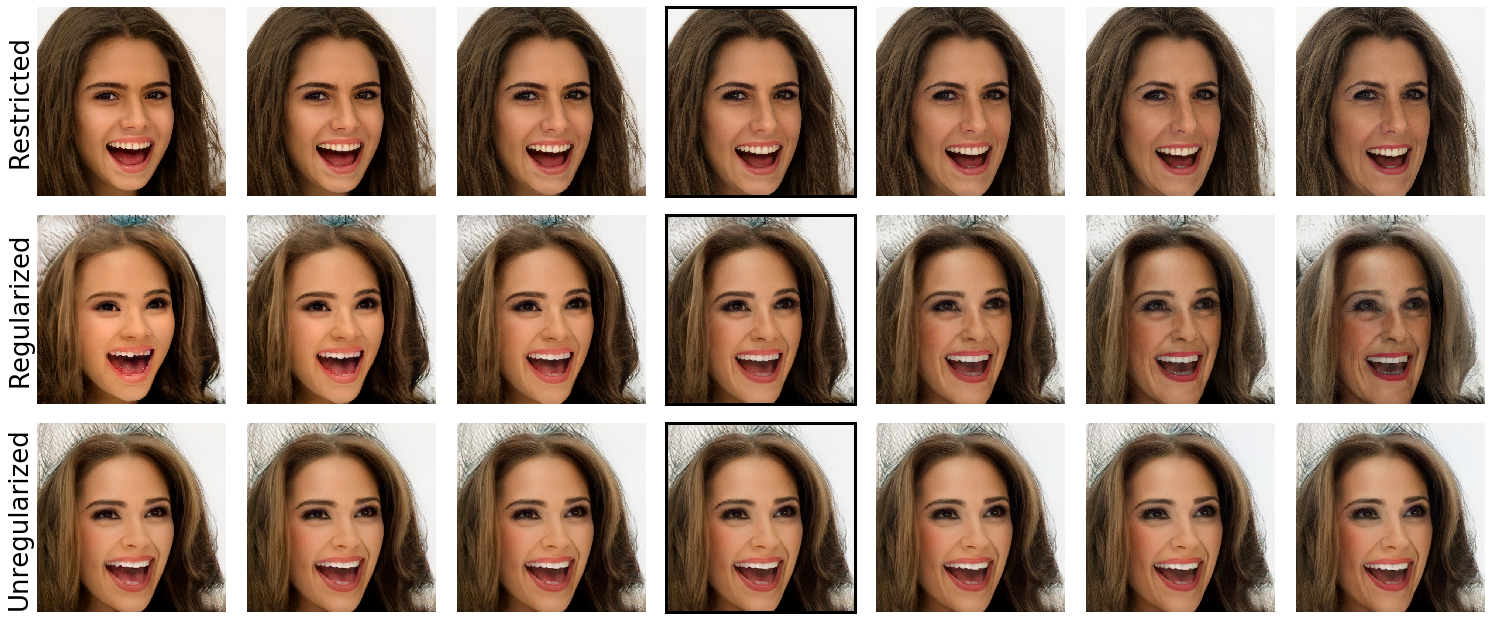

In [10]:
def visualize_individual_latent(transects_1d):
    '''viz 1-d transects for individual latent
    '''
    ims = np.array([transects_1d[a] for a in ATTRS])
    print(ims.shape)
    ims = ims.reshape((len(ATTRS), N_IMS, *ims.shape[2:]))
    util.plot_grid(ims, ylabs=[ATTR_LABELS[a] for a in ATTRS], fontsize_ylab=40)
    

def visualize_varying_reg(transects_1d):
    '''viz 1-d transect (1 attribute) for latents as reg changes
    '''
    REG_LABS = {
        10000: 'Restricted',
        1e-1: 'Regularized',
        0: 'Unregularized'
    }
    ims = np.array([transects_1d[a] for a in ATTRS])
    print(ims.shape)
    ims = ims.reshape((len(latents), N_IMS, *ims.shape[2:]))
    util.plot_grid(ims, ylabs=[REG_LABS[reg] for reg in regs], emphasize_col=N_IMS//2,
                   fontsize_ylab=26)
    plt.subplots_adjust(hspace=0)

    
# visualize_individual_latent(transects_1d)

# ax = plt.subplot(111, facecolor='white')
# plt.imshow(im_orig)
# plt.ylabel('Original', fontsize=40)
# util.emphasize_box(ax)
# util.savefig('manipulations_orig')

visualize_varying_reg(transects_1d)
util.savefig('manipulations_full_age')

# project things to be neutral
Note: this works sometimes, but note well enough to be used to aid in the matching process

In [ ]:
# load latents
for im_num in np.arange(10):
    im_orig_fname = oj(DIR_IMS, f'{im_num + 1:05}.jpg')
    im_gen_fname = oj(DIR_GEN, f'{im_num + 1:05}.png')
    latents = [np.load(oj(DIR_GEN, f'{im_num + 1:05}.npy'))]
    im_orig = mpimg.imread(im_orig_fname)
    im_gen = mpimg.imread(im_gen_fname)


    attr = 'C'
    im_neutral, W_neutral = transects.make_transects(
        G=G,
        attr=attr,
        latents=latents,
        force_project_to_boundary=False,
        N_IMS_LIST=[1],
        LIMS_LIST=[0, 0],
        return_project_to_boundary=True,
        orth=True,
    )
    util.plot_row([im_orig, im_gen, im_neutral], annot_list=['orig', 'rec', 'neutral'])

### 